## MINI-RFs

    This notebook contains random forrests that are constrained to a subet of the variables. For example, there will be a random forrest only predicting liver function tests with other liver function values. It should also be noted that a subset of "calculated variables" will be held off as strictly outputs. The idea here is to reduce the overall number of combinations by creating partitions for combinations. This is mathematically possible because the number of combinations formed from 30 variables is much larger than the number of combinations formed from 10 variables multiplied by 3. This thought can be expressed as an inequality: 2(30 choose 15 + 30 choose 14 + 30 choose 13 ...) >> 6(10 choose 5 + 10 choose 4 + 10 choose 3 ...)

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import torch.nn as nn
import torch
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

C:\Users\joshu\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel(r"C:\Users\joshu\Downloads\labs_complete.xlsx", index_col = "subject_id")
df.columns = df.columns.str.replace("_percentile", "")
df

,51221,51265,50912,50971,51222,51301,51249,51279,51250,51248,...,50813,50863,50885,50820,50862,50802,50821,50804,50818,50910
subject_id,,,,,,,,,,,,,,,,,,,,,
12138413,0.653935,0.471492,0.668170,0.122564,0.585660,0.379092,0.273604,0.508236,0.829349,0.653375,...,0.328330,0.188457,0.750168,0.371901,0.539988,0.660286,0.141536,0.662118,0.722870,0.642922
12988457,0.744261,0.549488,0.764983,0.873920,0.600321,0.128942,0.115307,0.782644,0.367417,0.135998,...,0.557945,0.414605,0.663706,0.807163,0.603970,0.469087,0.234647,0.287035,0.146159,0.226079
18624683,0.074887,0.071672,0.197234,0.012156,0.120607,0.564170,0.834371,0.080755,0.603556,0.757634,...,0.875884,0.103988,0.750168,0.485908,0.374253,0.273487,0.058992,0.287035,0.304645,0.898581
11914968,0.870576,0.616041,0.668170,0.122564,0.921972,0.945371,0.875151,0.799719,0.661008,0.850342,...,0.974600,0.565034,0.396615,0.154482,0.770091,0.108031,0.535329,0.117103,0.471935,0.878056
17957742,0.433584,0.264405,0.563640,0.886779,0.430006,0.735389,0.424468,0.512455,0.306750,0.246183,...,0.119353,0.475349,0.780999,0.872643,0.425130,0.660286,0.916355,0.436496,0.173674,0.886206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581271,0.851529,0.936860,0.197234,0.911493,0.799458,0.880900,0.358276,0.885898,0.306750,0.246183,...,0.735748,0.723036,0.841488,0.807163,0.660628,0.660286,0.538191,0.436496,0.234206,0.343193
13724012,0.100652,0.692532,0.834837,0.921640,0.083049,0.620707,0.148654,0.129871,0.423765,0.188027,...,0.977775,0.987380,0.959450,0.442467,0.323569,0.187239,0.042263,0.186881,0.200969,0.492001
17427308,0.588070,0.970488,0.895270,0.900040,0.460534,0.883511,0.104058,0.383889,0.921153,0.653375,...,0.875884,0.788995,0.841488,0.335876,0.374253,0.273487,0.009905,0.436496,0.615012,0.780260


In [3]:
labs = {
    "51221": "Hematocrit",
    "51265": "Platelet Count",
    "50912": "Creatinine",
    "50971": "Potassium",
    "51222": "Hemoglobin",
    "51301": "White Blood Cells",
    "51249": "MCHC",
    "51279": "Red Blood Cells",
    "51250": "MCV",
    "51248": "MCH",
    "51277": "RDW",
    "51006": "Urea Nitrogen",
    "50983": "Sodium",
    "50902": "Chloride",
    "50882": "Bicarbonate",
    "50868": "Anion Gap",
    "50931": "Glucose",
    "50960": "Magnesium",
    "50893": "Calcium, Total",
    "50970": "Phosphate",
    "51237": "INR(PT)",
    "51274": "PT",
    "51275": "PTT",
    "51146": "Basophils",
    "51256": "Neutrophils",
    "51254": "Monocytes",
    "51200": "Eosinophils",
    "51244": "Lymphocytes",
    "52172": "RDW-SD",
    "50934": "H",
    "51678": "L",
    "50947": "I",
    "50861": "Alanine Aminotransferase (ALT)",
    "50878": "Asparate Aminotransferase (AST)",
    "50813": "Lactate",
    "50863": "Alkaline Phosphatase",
    "50885": "Bilirubin, Total",
    "50820": "pH",
    "50862": "Albumin",
    "50802": "Base Excess",
    "50821": "pO2",
    "50804": "Calculated Total CO2",
    "50818": "pCO2",
    "52075": "Absolute Neutrophil Count",
    "52073": "Absolute Eosinophil Count",
    "52074": "Absolute Monocyte Count",
    "52069": "Absolute Basophil Count",
    "51133": "Absolute Lymphocyte Count",
    "50910": "Creatine Kinase (CK)",
    "52135": "Immature Granulocytes"
}
labs_reversed = {value: key for key, value in labs.items()}

### Define partitions

In [4]:
encode = lambda x: [labs_reversed[i] for i in x]
decode = lambda x: [labs[i] for i in x]

In [5]:
outputs_only = ["MCHC", "MCV", "MCH", "RDW", "RDW-SD", "Base Excess", "Calculated Total CO2","Anion Gap","INR(PT)"]
liver = ["Alanine Aminotransferase (ALT)", "Asparate Aminotransferase (AST)", "Platelet Count", "PT", "PTT", "Alkaline Phosphatase", "Bilirubin, Total",
        "Albumin","Calcium, Total", "Creatine Kinase (CK)", "Glucose", "Sodium"]
acid_base = ["pH", "pCO2", "Bicarbonate", "Phosphate", "Lactate", "Chloride", "Calcium, Total", "Glucose", "Sodium"]
immune = ["Basophils","Neutrophils","Monocytes","Eosinophils","Lymphocytes","White Blood Cells", "Glucose", "Sodium"]
kidney = ["Urea Nitrogen", "Creatinine", "Magnesium","Phosphate", "Potassium", "Bicarbonate", "Glucose", "Sodium"]
oxgen = ["Hematocrit","Hemoglobin", "Red Blood Cells", "pO2", "pCO2", "pH", "Glucose", "Sodium"]

In [6]:
out_encoded = encode(outputs_only)
liver_encoded = encode(liver)
acid_base_encoded = encode(acid_base)
immune_encoded = encode(immune)
kidney_encoded = encode(kidney)
oxgen_encoded = encode(oxgen)

### Get combinations for model

In [7]:
def get_combinations(var_list):

    comb_list = []

    for i in range(1,len(var_list)):

        combs = list(combinations(var_list, i))

        comb_list = comb_list + combs
        
    return comb_list

In [8]:
liver_combs = get_combinations(liver_encoded)
print(len(liver_combs))
acid_base_combs = get_combinations(acid_base_encoded)
print(len(acid_base_combs))
immune_combs = get_combinations(immune_encoded)
print(len(immune_combs))
kidney_combs = get_combinations(kidney_encoded)
print(len(kidney_combs))
oxgen_combs = get_combinations(oxgen_encoded)
print(len(oxgen_combs))

4094
510
254
254
254


### Test combinations with random forest

In [9]:
def rf(xs, y, n_estimators=200, max_samples=50,
       max_features=0.75, min_samples_leaf=10, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
MSE = nn.MSELoss()

In [10]:
df.columns

Index(['51221', '51265', '50912', '50971', '51222', '51301', '51249', '51279',
       '51250', '51248', '51277', '51006', '50983', '50902', '50882', '50868',
       '50931', '50960', '50893', '50970', '51237', '51274', '51275', '51146',
       '51256', '51254', '51200', '51244', '52172', '50861', '50878', '50813',
       '50863', '50885', '50820', '50862', '50802', '50821', '50804', '50818',
       '50910'],
      dtype='object')

In [11]:
def test_combinations(combs, cols, df):
    
    loss_df= pd.DataFrame(columns=['inputs', 'outputs', 'loss'])

    count = 0

    for comb in combs:

        comb = list(comb)
        
        targets = list(set(cols) - set(combs))

        y_df = df[targets]

        x_df = df[comb]

        y = y_df.to_numpy()
        x = x_df.to_numpy()

        r,c = y.shape 
        if c == 1:
            y = y.ravel() # prevents mismatched shapes in the second dimension

        m = rf(x,y)

        y_preds = m.predict(x)

        loss = float(MSE(torch.tensor(y), torch.tensor(y_preds)))

        loss_df.loc[len(loss_df)] = [decode(comb), decode(targets), loss]

        count += 1
        
        if count%50 == 0:
            
            print(loss)
            
    return loss_df

In [12]:
liver_losses = test_combinations(liver_combs, liver_encoded, df)
liver_losses

0.07129278049088728
0.06611055593014054
0.06380915868115566
0.06990346542964851
0.0661576552444173
0.06365343699154158
0.0636165337702674
0.06321881039598407
0.06299068942440526
0.06325533232361807
0.06328885282146769
0.06811800815276635
0.06803096924544222
0.06453746847208787
0.06470637243376837
0.06306259401569378
0.06280389960922754
0.06302277763195777
0.06313819098047102
0.060829459275251685
0.061277096804764015
0.06256236711873565
0.06276159618462196
0.062230688147953614
0.06139832154857867
0.06418635682435704
0.0642016523141885
0.06380105993921173
0.0666267708941052
0.0648079322220795
0.0629589324307918
0.061644200153414014
0.062256952741149216
0.061016027017991976
0.06267252096262158
0.06216529650173585
0.0605693726793776
0.06297837038446008
0.06152906662491953
0.062347893624749094
0.060529765736805255
0.06088118783924408
0.062158234735134286
0.0603777452300883
0.0604326074975541
0.06598459113727143
0.06529627913001763
0.062252583976518824
0.06324883280501564
0.06268974550239154

,inputs,outputs,loss
0,[Alanine Aminotransferase (ALT)],"[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.073378
1,[Asparate Aminotransferase (AST)],"[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.072275
2,[Platelet Count],"[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.078731
3,[PT],"[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.075875
4,[PTT],"[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.076526
...,...,...,...
4089,"[Alanine Aminotransferase (ALT), Asparate Amin...","[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.060213
4090,"[Alanine Aminotransferase (ALT), Asparate Amin...","[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.059594
4091,"[Alanine Aminotransferase (ALT), Asparate Amin...","[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.059361
4092,"[Alanine Aminotransferase (ALT), Platelet Coun...","[Calcium, Total, Albumin, Bilirubin, Total, Pl...",0.059299


In [13]:
ab_losses = test_combinations(acid_base_combs,acid_base_encoded, df)
ab_losses

0.0665509083199536
0.06670103305995534
0.06271114395656953
0.062039791415165746
0.06403762583650047
0.06085821646065856
0.061961419502616626
0.059901589470585874
0.060945152092745036
0.0601200665282332


,inputs,outputs,loss
0,[pH],"[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.080400
1,[pCO2],"[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.081946
2,[Bicarbonate],"[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.079748
3,[Phosphate],"[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.083027
4,[Lactate],"[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.084887
...,...,...,...
505,"[pH, pCO2, Bicarbonate, Phosphate, Chloride, C...","[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.058175
506,"[pH, pCO2, Bicarbonate, Lactate, Chloride, Cal...","[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.058611
507,"[pH, pCO2, Phosphate, Lactate, Chloride, Calci...","[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.058563
508,"[pH, Bicarbonate, Phosphate, Lactate, Chloride...","[Calcium, Total, Lactate, Phosphate, Glucose, ...",0.058567


In [14]:
immune_losses = test_combinations(immune_combs, immune_encoded, df)
immune_losses

0.05656558942556986
0.05074901526597939
0.0487587519949212
0.048904362705463
0.0463900779334026


,inputs,outputs,loss
0,[Basophils],"[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.067372
1,[Neutrophils],"[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.060372
2,[Monocytes],"[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.065937
3,[Eosinophils],"[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.067958
4,[Lymphocytes],"[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.062251
...,...,...,...
249,"[Basophils, Neutrophils, Monocytes, Eosinophil...","[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.046390
250,"[Basophils, Neutrophils, Monocytes, Lymphocyte...","[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.046637
251,"[Basophils, Neutrophils, Eosinophils, Lymphocy...","[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.047940
252,"[Basophils, Monocytes, Eosinophils, Lymphocyte...","[Monocytes, Neutrophils, Glucose, Lymphocytes,...",0.046394


In [15]:
kidney_losses = test_combinations(kidney_combs, kidney_encoded, df)
kidney_losses

0.06073639379606475
0.060044066162541314
0.05865056531145983
0.057580934937563805
0.05570332465549843


,inputs,outputs,loss
0,[Urea Nitrogen],"[Creatinine, Phosphate, Glucose, Potassium, So...",0.072524
1,[Creatinine],"[Creatinine, Phosphate, Glucose, Potassium, So...",0.074797
2,[Magnesium],"[Creatinine, Phosphate, Glucose, Potassium, So...",0.078320
3,[Phosphate],"[Creatinine, Phosphate, Glucose, Potassium, So...",0.073512
4,[Potassium],"[Creatinine, Phosphate, Glucose, Potassium, So...",0.076618
...,...,...,...
249,"[Urea Nitrogen, Creatinine, Magnesium, Phospha...","[Creatinine, Phosphate, Glucose, Potassium, So...",0.055703
250,"[Urea Nitrogen, Creatinine, Magnesium, Potassi...","[Creatinine, Phosphate, Glucose, Potassium, So...",0.056561
251,"[Urea Nitrogen, Creatinine, Phosphate, Potassi...","[Creatinine, Phosphate, Glucose, Potassium, So...",0.055377
252,"[Urea Nitrogen, Magnesium, Phosphate, Potassiu...","[Creatinine, Phosphate, Glucose, Potassium, So...",0.055114


In [16]:
oxgen_losses = test_combinations(oxgen_combs, oxgen_encoded, df)
oxgen_losses

0.05248895200479077
0.05287558973029474
0.05061781441065106
0.04909158844096274
0.04841150736675669


,inputs,outputs,loss
0,[Hematocrit],"[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.059623
1,[Hemoglobin],"[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.061034
2,[Red Blood Cells],"[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.062210
3,[pO2],"[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.082828
4,[pCO2],"[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.078384
...,...,...,...
249,"[Hematocrit, Hemoglobin, Red Blood Cells, pO2,...","[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.048412
250,"[Hematocrit, Hemoglobin, Red Blood Cells, pCO2...","[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.047255
251,"[Hematocrit, Hemoglobin, pO2, pCO2, pH, Glucos...","[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.047478
252,"[Hematocrit, Red Blood Cells, pO2, pCO2, pH, G...","[pO2, Hemoglobin, Glucose, pCO2, Sodium, pH, H...",0.046954


### Plot Losses to find Good Ratio

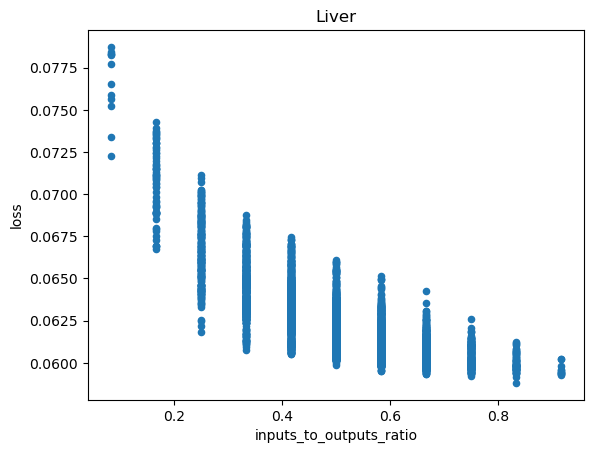

In [17]:
liver_losses["inputs_to_outputs_ratio"] = liver_losses["inputs"].apply(len)/liver_losses["outputs"].apply(len)
liver_losses["inputs_to_outputs_ratio"]
liver_losses.plot.scatter(x='inputs_to_outputs_ratio', y='loss', title='Liver')
plt.show()

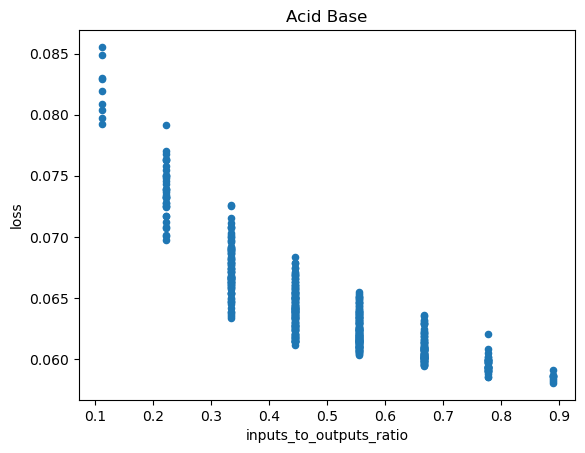

In [18]:
ab_losses["inputs_to_outputs_ratio"] = ab_losses["inputs"].apply(len)/ab_losses["outputs"].apply(len)
ab_losses["inputs_to_outputs_ratio"]
ab_losses.plot.scatter(x='inputs_to_outputs_ratio', y='loss', title='Acid Base')
plt.show()

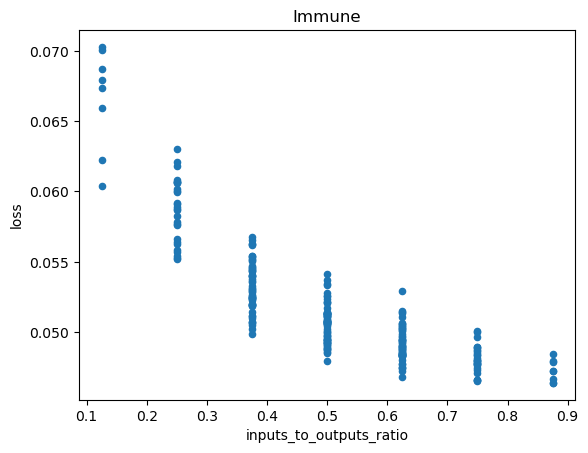

In [19]:
immune_losses["inputs_to_outputs_ratio"] = immune_losses["inputs"].apply(len)/immune_losses["outputs"].apply(len)
immune_losses["inputs_to_outputs_ratio"]
immune_losses.plot.scatter(x='inputs_to_outputs_ratio', y='loss', title='Immune')
plt.show()

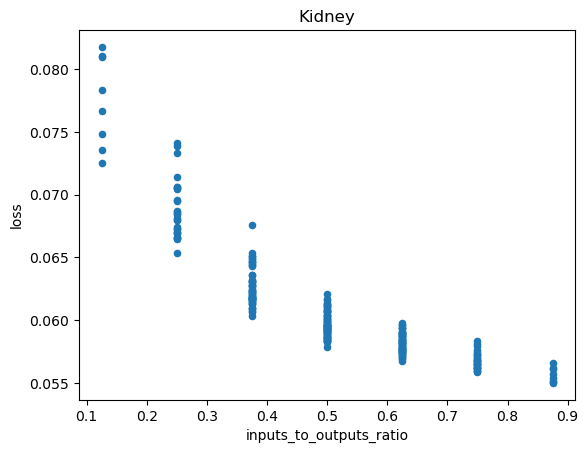

In [20]:
kidney_losses["inputs_to_outputs_ratio"] = kidney_losses["inputs"].apply(len)/kidney_losses["outputs"].apply(len)
kidney_losses["inputs_to_outputs_ratio"]
kidney_losses.plot.scatter(x='inputs_to_outputs_ratio', y='loss', title='Kidney')
plt.show()

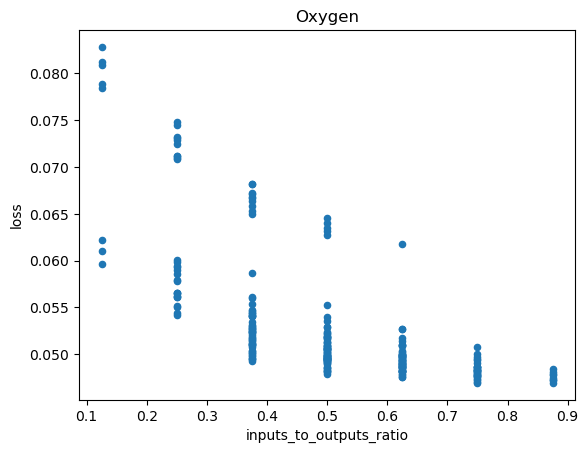

In [21]:
oxgen_losses["inputs_to_outputs_ratio"] = oxgen_losses["inputs"].apply(len)/oxgen_losses["outputs"].apply(len)
oxgen_losses["inputs_to_outputs_ratio"]
oxgen_losses.plot.scatter(x='inputs_to_outputs_ratio', y='loss', title='Oxygen')
plt.show()

In [22]:
liver_losses.to_excel(r"C:\Users\joshu\Downloads\liver_losses.xlsx")
ab_losses.to_excel(r"C:\Users\joshu\Downloads\ab_losses.xlsx")
immune_losses.to_excel(r"C:\Users\joshu\Downloads\immune_losses.xlsx")
kidney_losses.to_excel(r"C:\Users\joshu\Downloads\kidney_losses.xlsx")
oxgen_losses.to_excel(r"C:\Users\joshu\Downloads\oxgen_losses.xlsx")

### Select variables based on results

In [ ]:
liver_losses = pd.read_excel(r"C:\Users\joshu\Downloads\liver_losses.xlsx")
ab_losses = pd.read_excel(r"C:\Users\joshu\Downloads\ab_losses.xlsx")
immune_losses = pd.read_excel(r"C:\Users\joshu\Downloads\immune_losses.xlsx")
kidney_losses = pd.read_excel(r"C:\Users\joshu\Downloads\kidney_losses.xlsx")
oxgen_losses = pd.read_excel(r"C:\Users\joshu\Downloads\oxgen_losses.xlsx")

In [29]:
liver_feats = liver_losses[liver_losses["inputs_to_outputs_ratio"] < 0.3].sort_values(by = "loss").iloc[0,0]
ab_feats = ab_losses[ab_losses["inputs_to_outputs_ratio"] < 0.4].sort_values(by = "loss").iloc[0,0]
immune_feats = immune_losses[immune_losses["inputs_to_outputs_ratio"] < 0.4].sort_values(by = "loss").iloc[0,0]
kidney_feats = kidney_losses[kidney_losses["inputs_to_outputs_ratio"] < 0.4].sort_values(by = "loss").iloc[0,0]
oxygen_feats = oxgen_losses[oxgen_losses["inputs_to_outputs_ratio"] < 0.4].sort_values(by = "loss").iloc[0,0]

In [30]:
total_feats = list(set(liver_feats+ab_feats+immune_feats+kidney_feats+oxygen_feats))

In [31]:
total_feats

['PTT',
 'Bicarbonate',
 'Calcium, Total',
 'Glucose',
 'pCO2',
 'Sodium',
 'Neutrophils',
 'pH',
 'Chloride',
 'Hemoglobin',
 'Phosphate',
 'Alanine Aminotransferase (ALT)',
 'Urea Nitrogen']

### Test predictive power of features

In [32]:
cols = decode(df.columns.to_list())
targets = list(set(cols) - set(total_feats))
targets

['RDW',
 'INR(PT)',
 'pO2',
 'Hematocrit',
 'Alkaline Phosphatase',
 'Lactate',
 'Eosinophils',
 'Potassium',
 'Anion Gap',
 'Magnesium',
 'Base Excess',
 'Lymphocytes',
 'Creatinine',
 'Basophils',
 'Bilirubin, Total',
 'Monocytes',
 'MCV',
 'Albumin',
 'PT',
 'MCH',
 'Red Blood Cells',
 'Platelet Count',
 'RDW-SD',
 'MCHC',
 'White Blood Cells',
 'Asparate Aminotransferase (AST)',
 'Calculated Total CO2',
 'Creatine Kinase (CK)']

In [33]:
loss_df= pd.DataFrame(columns=['output', 'loss'])

for target in targets:

    y_df = df[encode([target])]

    x_df = df[encode(total_feats)]

    y = y_df.to_numpy()
    x = x_df.to_numpy()

    r,c = y.shape 
    if c == 1:
        y = y.ravel() # prevents mismatched shapes in the second dimension

    m = rf(x,y)

    y_preds = m.predict(x)

    loss = float(MSE(torch.tensor(y), torch.tensor(y_preds)))

    loss_df.loc[len(loss_df)] = [target, loss]

    print(loss)

0.06307653261157191
0.04161875191700439
0.06262321246702486
0.012025609020842863
0.0694005764650027
0.06222438049566529
0.046958301423576335
0.07496884290529178
0.04195268470002645
0.07685275703218039
0.028824741480833995
0.02625890571956279
0.032233423903018886
0.05352740241633252
0.05627600388575171
0.06735363706463617
0.07788912538901616
0.05180016944714871
0.05108999846210978
0.07740607386529191
0.024171409079919493
0.075422046086467
0.06209474305704317
0.05941176205015186
0.06690046252632703
0.03198601019094609
0.0279626250061715
0.06590534176485019


In [34]:
loss_df

,output,loss
0,RDW,0.063077
1,INR(PT),0.041619
2,pO2,0.062623
3,Hematocrit,0.012026
4,Alkaline Phosphatase,0.069401
5,Lactate,0.062224
6,Eosinophils,0.046958
7,Potassium,0.074969
8,Anion Gap,0.041953
9,Magnesium,0.076853


### Run a tuning experiment on the selected features

In [166]:
df_test = pd.read_csv(r"C:\Users\joshu\Downloads\test (1).csv")
df_percentiles = df_test.loc[:,df_test.columns.str.contains('percentile')]
df_percentiles.index = df_test["subject_id"]
least_common = ['50947','50934','51678','52135','51133','52069','52074','52073','52075']
drop = [x + "_percentile" for x in least_common]
df_common = df_percentiles.drop(drop, axis=1)
df_test = df_common.dropna()
df_test.columns = df.columns.str.replace("_percentile", "")

In [167]:
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Y = df[encode(targets)]
X = df[encode(total_feats)]

x_test = df_test[encode(total_feats)]
y_test = df_test[encode(targets)]


def objective(trial):
    # Define hyperparameters to tune
    params = {
        #n_estimators=200, max_samples=50,
        #max_features=0.75, min_samples_leaf=10
        'n_estimators': trial.suggest_int('n_estimators', 10, 700),
        'min_samples_leaf': 1,
        'max_features': trial.suggest_float('max_features', 0.5,1.0),
        'max_samples': trial.suggest_int('max_samples', 50, 360),
        'max_depth': trial.suggest_int('max_depth', 10, 200, log=True),
    }

    # Create model
    model = RandomForestRegressor(**params)

    # Train model
    model.fit(X, Y)

    # Evaluate model
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

In [168]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials= 1000)

# Print the best hyperparameters
print('Best trial:')
trial = study.best_trial
print(f'  MSE: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2025-03-15 20:16:44,869] A new study created in memory with name: no-name-a2270cf5-4be3-458e-a7f3-62e2f0a8ce1d
[I 2025-03-15 20:16:46,107] Trial 0 finished with value: 0.05544815742266336 and parameters: {'n_estimators': 657, 'max_features': 0.6254313723870886, 'max_samples': 207, 'max_depth': 98}. Best is trial 0 with value: 0.05544815742266336.
[I 2025-03-15 20:16:46,297] Trial 1 finished with value: 0.0554204757982675 and parameters: {'n_estimators': 101, 'max_features': 0.5224753733244822, 'max_samples': 292, 'max_depth': 42}. Best is trial 1 with value: 0.0554204757982675.
[I 2025-03-15 20:16:46,781] Trial 2 finished with value: 0.05475072319068018 and parameters: {'n_estimators': 215, 'max_features': 0.590164418267775, 'max_samples': 330, 'max_depth': 132}. Best is trial 2 with value: 0.05475072319068018.
[I 2025-03-15 20:16:47,658] Trial 3 finished with value: 0.055080840961779225 and parameters: {'n_estimators': 395, 'max_features': 0.6819688860012079, 'max_samples': 253, 'm

Best trial:
  MSE: 0.051933372736268066
  Params: 
    n_estimators: 44
    max_features: 0.9128376331116463
    max_samples: 329
    max_depth: 23


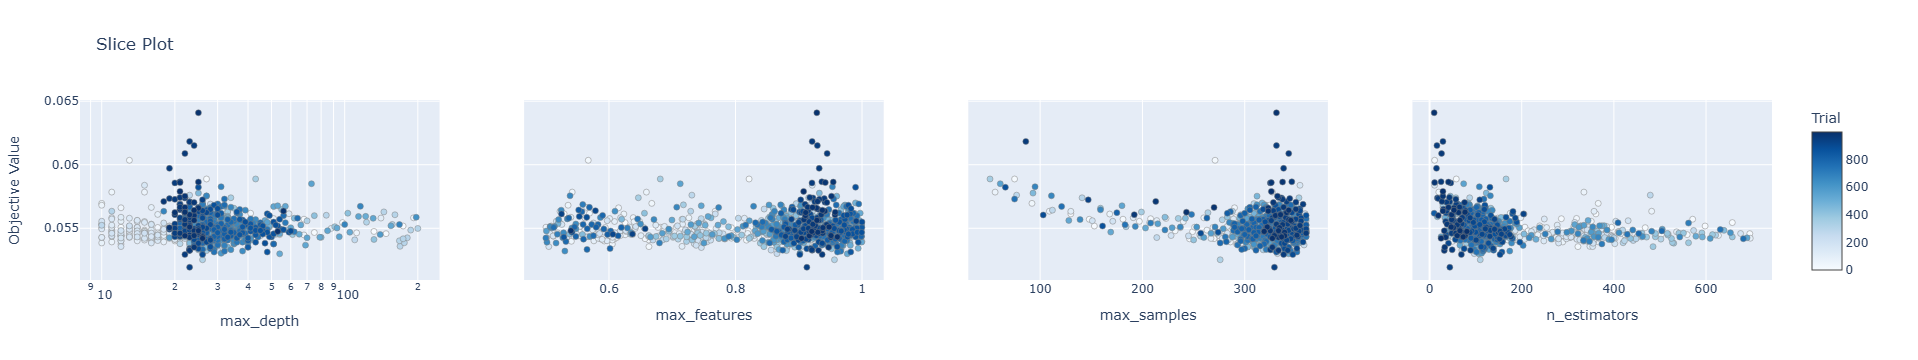

In [169]:
# Plot optimization history
optuna.visualization.plot_optimization_history(study)

# Plot parameter importance
optuna.visualization.plot_param_importances(study)

# Plot slice plot
optuna.visualization.plot_slice(study)

### Use optimized params

In [172]:
def rf2(xs, y, n_estimators=44, max_samples=329,
       max_features=0.9128376331116463, min_samples_leaf=1, max_depth= 23, **kwargs):
    return RandomForestRegressor(n_jobs=-1, max_depth=max_depth, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
MSE = nn.MSELoss()

In [173]:
loss_df= pd.DataFrame(columns=['output', 'loss'])

for target in targets:

    y_df = df[encode([target])]

    x_df = df[encode(total_feats)]

    y = y_df.to_numpy()
    x = x_df.to_numpy()

    r,c = y.shape 
    if c == 1:
        y = y.ravel() # prevents mismatched shapes in the second dimension

    m = rf2(x,y)

    y_preds = m.predict(x)

    loss = float(MSE(torch.tensor(y), torch.tensor(y_preds)))

    loss_df.loc[len(loss_df)] = [target, loss]

    print(loss)

0.011932660009997037
0.007370040896655815
0.011935530763071286
0.000915794214920467
0.013497854709838717
0.011112668605946329
0.00904218085807205
0.013338145475350298
0.006079037205930084
0.014411009678106728
0.0028287122098159955
0.004254529778909088
0.0053872002227730535
0.009654516803331152
0.010672073906708084
0.013509789416867235
0.015260713232295707
0.00997444460005842
0.008852406760927252
0.01445271660709834
0.003960951819270458
0.01504695023534993
0.010419992783399506
0.010354209617208602
0.012485413754794835
0.005291929958536519
0.0026363438238253185
0.011678959276102182


In [174]:
loss_df

,output,loss
0,RDW,0.011933
1,INR(PT),0.007370
2,pO2,0.011936
3,Hematocrit,0.000916
4,Alkaline Phosphatase,0.013498
5,Lactate,0.011113
6,Eosinophils,0.009042
7,Potassium,0.013338
8,Anion Gap,0.006079
9,Magnesium,0.014411


### Use test split to see if model is overfitting

In [175]:
df_test = pd.read_csv(r"C:\Users\joshu\Downloads\test (1).csv")
df_percentiles = df_test.loc[:,df_test.columns.str.contains('percentile')]
df_percentiles.index = df_test["subject_id"]
least_common = ['50947','50934','51678','52135','51133','52069','52074','52073','52075']
drop = [x + "_percentile" for x in least_common]
df_common = df_percentiles.drop(drop, axis=1)
df_test = df_common.dropna()
df_test.columns = df.columns.str.replace("_percentile", "")

In [176]:
df_test.to_excel(r"C:\Users\joshu\Downloads\test_complete.xlsx")

In [177]:
loss_df= pd.DataFrame(columns=['output', 'loss'])

for target in targets:
    
    x_df = df[encode(total_feats)]
    y_df = df[encode([target])]
    
    x_test_df = df_test[encode(total_feats)]
    y_test_df = df_test[encode([target])]

    y = y_df.to_numpy()
    x = x_df.to_numpy()
    
    x_test = x_test_df.to_numpy()
    y_test = y_test_df.to_numpy()
    
    y = y.ravel()
    y_test = y_test.ravel() # prevents mismatched shapes in the second dimension

    m = rf2(x,y)

    y_preds = m.predict(x_test)

    loss = float(MSE(torch.tensor(y_test), torch.tensor(y_preds)))

    loss_df.loc[len(loss_df)] = [target, loss]

    print(loss)

0.06439927020919524
0.0340142617862039
0.06440349598082712
0.0030794013411275093
0.060798930063906347
0.0758563802773949
0.06893299392123697
0.08183100326665742
0.02520406312552282
0.04306683316557553
0.00893438791020786
0.04030497734811264
0.027397708451183448
0.04733440116296951
0.03184735632126907
0.09552394392701108
0.07622271310756207
0.05680000418970818
0.05206114503494544
0.08897918589627185
0.009918186551181735
0.09404532478608287
0.04097119740575502
0.06267142712571644
0.044620560088815514
0.04762589139448933
0.003050927971460094
0.09391109697329612


In [178]:
loss_df

,output,loss
0,RDW,0.064399
1,INR(PT),0.034014
2,pO2,0.064403
3,Hematocrit,0.003079
4,Alkaline Phosphatase,0.060799
5,Lactate,0.075856
6,Eosinophils,0.068933
7,Potassium,0.081831
8,Anion Gap,0.025204
9,Magnesium,0.043067
